# Object-oriented Programming for Medical Imaging Functionality Demo

This demonstration is intended to showcase the potential of using an object-oriented approach to manage medical image data in pyhton in preparation for ML. We will demonstrate the framework using the first 30 CT images of the following dataset https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6ACUZJ. 

The dataset consists of CT images of subjects with confirmed lung infections after a positive Covid-19 diagnosis. Each Subject has its own directory that may or may not contain additional subdirectories. Within a single one of these subdirectories for each Subject is a series of .dcm (DICOM) files accounting for several different CT scan volumes representing different types CT scans for that patient.

We will demonstrate how to use the library to view and analyse the scans both individually and at a patient and dataset level. We will also demonstrate how these objects can be saved in the different file formats common in machine learning assisted medical imaging.



In [1]:
from Management import medOOP_3D
from Visualisation import medVIZ_3D
import Parsing.parse_funcs as pf
from tqdm import tqdm


First, we will create a list of pairs consisting of our subject directory path and the subject title.

In [2]:
dicom_root_dir = "/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_CT_Dicom"
nifti_output_root_dir = "/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_CT_Nifti"
slice_output_root_dir = "/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_Slices"



dir_list = pf.get_sub_directories(dicom_root_dir)
dir_list = pf.inner_sub_dir_replace(dir_list) 
paired_list = pf.get_path_id_list(dir_list)




Here is what this list looks like; as some of the patient directories contain multiple sub-directories, it's necessary to do this for this dataset to achieve a proper patient naming convention. In the future, it may be a good idea to add a regex-powered search function to do this within the library itself - but for now, this is the simplest and most customisable way of doing this.

In [3]:
paired_list[:3]

[('/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_CT_Dicom/Subject (1009)',
  'Subject_(1009)'),
 ('/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_CT_Dicom/Subject (1003)',
  'Subject_(1003)'),
 ('/Users/eamonmcandrew/Desktop/ML/CT_work/Covid_Positive_CT/Covid_Positive_CT_Dicom/Subject (1000)',
  'Subject_(1000)')]

Let's use one of the pairs in this list to create a patient object and explore its functionality.

In [4]:
Patient_1 = medOOP_3D.Patient(paired_list[0][0], paired_list[0][1])




First, let us check we are working with the correct patient by checking the patient ID.

In [5]:
Patient_1.patient_id

'Subject_(1009)'

We can call the patient object on its own to get a quick summary of its information. We can see here this paitent has four different scan types associated with it.


In [6]:
Patient_1

Patient Object concisting of 4 scans : UNNAMED_SERIES, LUNG_3_mm, LUNG, Mediastinum

A patient object is a collection of one or more scan objects belonging to a single subject and their associated metadata. All we need to do is supply a directory and title to the Patient class creator, and it will automatically generate a Scan object for each individual scan using the underlying Dicom files in the directory.

Let's take a look at the scan objects attributed to this patient.

In [7]:
Patient_1.scan_list

['UNNAMED_SERIES', 'LUNG_3_mm', 'LUNG', 'Mediastinum']

Lets now take a closer look at the scan titled "LUNG". We can simply call a Scan object in the same manner as a Paitent object to get a wuick sumary of its information.

In [8]:
Patient_1.LUNG

Scan Object titled LUNG, with dimensions (158, 512, 512)

If we want to quickly examine the scans, we can use the following to display the image and use the slider to examine the whole volume: *NOTE this is disabled at for 3D volumes at present because it stops GitHub from rendering the example notebook - but it should function perfectly with a local install* 

Because of this, we will inspect the unnamed series, which only contains a single slice making it effectively 2D.


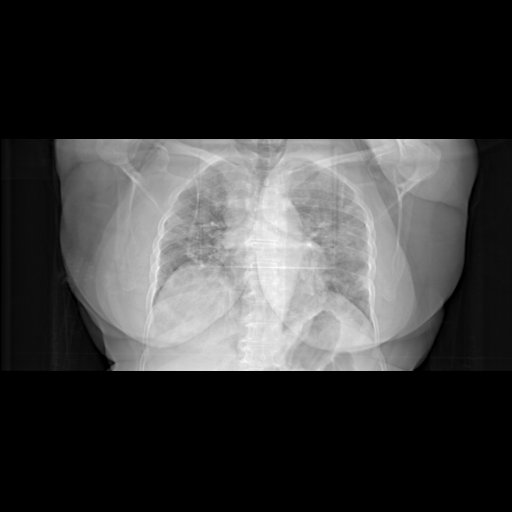

In [9]:
Patient_1.UNNAMED_SERIES.display()

We can quickly write this scan to a directory of choice in several different formats; here will convert the 3D volume into 2D axial slices in PNG format.

In [10]:
Patient_1.LUNG.to_slices(slice_output_root_dir)

Working at the patient level is excellent, but we often must work with large datasets. We can easily do this by loading the entire list into the Dataset class creator. 

In [11]:
Dataset_1 = medOOP_3D.Dataset(paired_list)


Processing Subject_1002: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]


The creator will automatically create a patient object for each subject and also create a Scan object for each scan attributed to that patient.

In this manner, let's examine the patient example we have used at each stage.

In [12]:
Dataset_1.Subject_1009

Patient Object concisting of 4 scans : UNNAMED_SERIES, LUNG_3_mm, LUNG, Mediastinum

Let's take a look at another patient in the dataset, and we can easily select one because type hints will display the patients in the dataset. As you can see, this patient actually has a different number of scans compared to the previous example.

In [13]:
Dataset_1.Subject_102

Patient Object concisting of 5 scans : UNNAMED_SERIES, Mediastinum, Lung, Lung_1.5, Mediastinum_1.5

We can have a closer look at the scans attributed to this patient.

In [14]:
Dataset_1.Subject_102.scan_list

['UNNAMED_SERIES', 'Mediastinum', 'Lung', 'Lung_1.5', 'Mediastinum_1.5']

Perhaps a more detailed description of each scan will help us understand what's going on here.

In [15]:
for scan in Dataset_1.Subject_102:
    print(scan)

Scan Object titled UNNAMED_SERIES, with dimensions (1, 512, 512)
Scan Object titled Mediastinum, with dimensions (46, 512, 512)
Scan Object titled Lung, with dimensions (37, 512, 512)
Scan Object titled Lung_1.5, with dimensions (181, 512, 512)
Scan Object titled Mediastinum_1.5, with dimensions (181, 512, 512)


We now have a Dataset object that consists of 30 patients with at least four distinct scan objects each.

In [16]:
Dataset_1.num_patients

30

Here we will quickly list the patients by their IDs to ensure they are all correct.

In [17]:
Dataset_1.patient_list

['Subject_1009',
 'Subject_1003',
 'Subject_1000',
 'Subject_1011',
 'Subject_1018',
 'Subject_1012',
 'Subject_102',
 'Subject_1016',
 'Subject_10',
 'Subject_1015',
 'Subject_101',
 'Subject_1021',
 'Subject_1004',
 'Subject_1022',
 'Subject_1007',
 'Subject_1023',
 'Subject_1006',
 'Subject_1020',
 'Subject_1005',
 'Subject_1014',
 'Subject_100',
 'Subject_1017',
 'Subject_1019',
 'Subject_1013',
 'Subject_1',
 'Subject_1010',
 'Subject_1024',
 'Subject_1001',
 'Subject_1008',
 'Subject_1002']

In order to demonstrate the composability of the Dataset, Patient and Scan objects, I have chosen to write these functions here. In the finished version, these and other similar functionality will have dedicated function calls, but these will serve as an example of the power enabled by the object-oriented approach.

First, let us create a directory of PNG slices for each patient scan titled "LUNG". This task takes six lines of code to complete (fancy progress bar included) and is highly customisable to allow a user to select precisely which patients and scans they desire.

In [18]:
pbar = tqdm(Dataset_1)
for patient in pbar:
    for scan in patient:
        if scan.title == "LUNG":
            scan.to_slices(slice_output_root_dir)
            pbar.set_description(f"Creating PNG slices for {patient.patient_id} : {scan.title}")

           

  0%|          | 0/30 [00:00<?, ?it/s]


AttributeError: 'Scan' object has no attribute 'Vol_to_slices'

Now we shall do the same thing, but instead of slices, let us generate a NIfti file for each of the "LUNG" scans.

In [ ]:
pbar = tqdm(Dataset_1)
for patient in pbar:
    for scan in patient:
        if scan.title == "LUNG":
            scan.to_nifti(nifti_output_root_dir)
            pbar.set_description(f"Creating Nifti file for {patient.patient_id} : {scan.title}")


Creating Nifti file for Subject_1002 : LUNG: 100%|██████████| 30/30 [01:37<00:00,  3.24s/it]


The complete Dataset we are working with has the CT image data for 1000 unique patients, and it's interesting to note the different number of scans attributed to each patient, even in the first 30 patients.

Here we can print the number of scans each patient in the dataset has in a very efficient and pythonic manner using list comprehension. We can also see that calling len() on a Patient object returns the number of scans.

In [ ]:
print("Number of scans per patient :",[len(patient) for patient in Dataset_1])

Number of scans per patient : [4, 4, 4, 4, 4, 4, 5, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4]


In [ ]:
len(Dataset_1)

30